In [238]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [239]:
"""
sample code to implement a graph structure within python
"""

import numpy

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize']=(8,4)

In [240]:
class Vertex(object):
    v_cnt = 0
    def __init__(self, vid):
        self.vid = vid
        self.neighbors = set([])
        Vertex.v_cnt+=1
        
    def add_neighbor(self,nvid):
        self.neighbors.add(nvid)
        
    def count_neighbors(self):
        return len(self.neighbors)
    
    def return_neighbors(self):
        return self.neighbors
    
    @classmethod
    def count_vertices(cls):
        return cls.v_cnt
        
    def __str__(self):
        return str([str(i) for i in self.neighbors])
    
    def __repr__(self):
        return str([str(i) for i in self.neighbors])
    

    
class MinHeap(object):
    
    def heapify(self,new_data): #add new element to existing heap structure
        self.data.append(new_data)
        
        i = len(self.data)-1
        while i>0 and self.data[i]<self.data[int((i-1)/2)]:
            self.data[i],self.data[int((i-1)/2)] = self.data[int((i-1)/2)],self.data[i]
            i = int((i-1)/2)
            
    def pop_min(self):
        if len(self.data)==1:
            outdata = self.data[0]
            self.data = []
            return outdata
        
        self.data[0],self.data[-1] = self.data[-1],self.data[0]
        outdata = self.data.pop()
        i=0
        while ((i*2+2)<len(self.data) and self.data[i]>self.data[i*2+2])\
            or ((i*2+1)<len(self.data) and self.data[i]>self.data[i*2+1]): #sink steps
                
            if (i*2+2)<len(self.data):
                
                if self.data[i*2+1]<self.data[i*2+2]:
                    self.data[i],self.data[i*2+1] = self.data[i*2+1],self.data[i]
                    i = i*2+1
                else:
                    self.data[i],self.data[i*2+2] = self.data[i*2+2],self.data[i]
                    i = i*2+2
            else:
                self.data[i],self.data[i*2+1] = self.data[i*2+1],self.data[i]
                i = i*2+1
                
            
        return outdata
    
    def __init__(self,data=[]):
        self.data = []
        for item in data:
            self.heapify(item)
    
    def peek(self):
        return self.data[0]
    
    def show(self):
        return self.data
    
    def size(self):
        return len(self.data)
    
    def __str__(self):
        return str(self.data)
    
    def __repr__(self):
        return str(self.data)
    
    def is_empty(self):
        return len(self.data)==0
        


In [241]:
h = MinHeap([1,4,2,3,7,5,9,6])
h.show()
h.heapify(0)
h.show()

while not h.is_empty():
    print h.pop_min()

0
1
2
3
4
5
6
7
9


In [242]:
# read in from file

inpath = 'ca-AstroPh.txt'

vertices = {}
istop = 0
with open(inpath) as infile:
    for line in infile:
        istop+=1
        #if istop>500000:break
            
        if '#' in line: continue
            
        ls = line.split('\t')[0:2]
        vk1 = int(ls[0])
        vk2 = int(ls[1])
        
        if vk1 not in vertices:
            vertices[vk1] = Vertex(vk1)    
        vertices[vk1].add_neighbor(vk2)
        
        if vk2 not in vertices:
            vertices[vk2] = Vertex(vk2)    
        vertices[vk2].add_neighbor(vk1)
        
        

In [243]:
print len(vertices)
print Vertex.count_vertices()
#print vertices.keys()
#print vertices

18772
18772


Interesting things to do
 implement Dijkstra
 implement Astar
 diameter of graph
 most popular node
 disjoint subgraphs
 min dist between 2 points
 number of loops

In [244]:
# detect most popular subgraph
maxe = (-1,-1)
for vid in vertices:
    ecnt = vertices[vid].count_neighbors()
    if ecnt>maxe[1]:
        maxe = (vid,ecnt)
print maxe

(53213, 504)


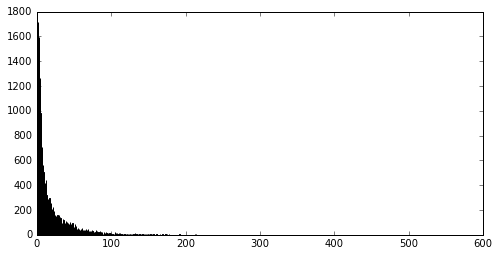

In [245]:
# histogram of subgraph cnt
ecnt = []

for vid in vertices:
    ecnt.append(vertices[vid].count_neighbors())
pylab.rcParams['figure.figsize']=(8,4)
xx = plt.hist(ecnt,maxe[1]*4)

In [246]:
# Find disjoint subgraphs
start_set = set(vertices.keys())
print 'beginning with '+str(len(start_set))+' elements'
end_set_list = []

while start_set:
    sub_set = set([])
    queue_set = set([])
    
    queue_set.add(start_set.pop())
    
    while queue_set:
        vid = queue_set.pop() #get random element from queue
        neighbor_set = vertices[vid].return_neighbors() #find its neighbors
        neighbor_set.difference_update(sub_set) #remove any neighbors that exist in sub_set
        if neighbor_set:
            queue_set.update(neighbor_set) # add remaining neighbors to queue set
        sub_set.add(vid) #send current element to sub_set
        if vid in start_set:
            start_set.remove(vid) #and remove from start_set
    
    end_set_list.append(sub_set)
  
print len(end_set_list),'total sets'
print ''
for sub_set in end_set_list:
    print len(sub_set)
    

beginning with 18772 elements
290 total sets

17903
2
2
2
4
2
3
3
9
4
2
2
3
10
4
2
4
2
5
18
3
7
3
8
2
3
8
5
2
4
3
5
3
3
4
2
2
3
4
4
2
5
3
3
3
3
3
2
3
3
2
2
3
2
3
3
2
4
4
2
2
2
2
8
3
5
5
2
2
5
3
4
4
2
2
3
3
5
4
2
2
3
3
3
2
3
2
3
2
3
5
2
3
4
2
3
2
2
3
3
2
3
2
2
2
3
12
3
2
3
4
2
2
4
2
3
2
2
4
3
4
3
7
5
2
2
2
2
2
5
2
4
2
3
2
4
3
2
3
3
2
2
2
2
4
3
4
3
3
3
2
4
3
10
4
2
3
2
2
3
2
7
3
4
2
3
2
3
2
5
3
2
4
2
2
2
3
3
6
3
2
2
4
2
2
2
6
2
2
5
2
2
4
3
4
2
2
2
4
2
4
2
2
6
3
3
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
3
3
2
2
3
2
3
2
4
2
2
3
3
2
3
5
2
2
2
2
2
2
2
2
3
2
3
2
2
4
2
3
2
3
2
3
2
2
4
2
2
3
2
4
2
2
3
3
2
2
2
2
2
2
2
3
2
2
4
3
3
2
2
3
2
2
2
1


In [250]:
# implement Dijkstra

v1 = list(end_set_list[0])[0]
v2 = list(end_set_list[0])[-2]
print v1,v2

dist_dict = {} #vid:distance
frontier_heap = MinHeap([(0,v1)]) #AKA frontier
    
while v2 not in dist_dict:
    #if len(dist_dict)%100000==0: print len(dist_dict)
    cur_dist,vid = frontier_heap.pop_min()
    
    neighbors_to_enqueue = [(cur_dist+1,new_vid) for new_vid in vertices[vid].return_neighbors()\
                           if new_vid not in dist_dict]
    
    for item in neighbors_to_enqueue:
        frontier_heap.heapify(item)
    
    dist_dict[vid] = cur_dist

print len(dist_dict)
print dist_dict[v2]

3 65534
12975
6


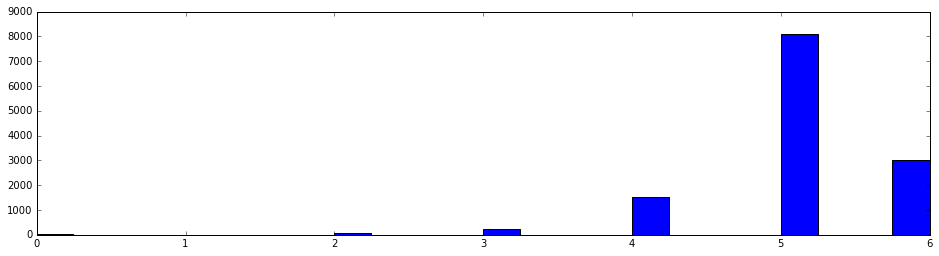

In [251]:
pylab.rcParams['figure.figsize']=(16,4)
xx = plt.hist(dist_dict.values(),max(dist_dict.values())*4)